In [1]:
import sys
sys.path.append('../')

import jax
# set jax precision 64 bit
jax.config.update("jax_enable_x64", True)

from jax import vmap
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from jax.numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
from src.trees import get_1d_tree, get_data_1d, plot_1d_tree, is_far, get_real_features
from src.trees import flatten_around_point, get_features, plot_1d_tree, data_plotter
from src.trees import potential_from_features, potential_from_points
from flax.training import train_state
import optax
import jax
import jax.numpy as jnp
import time
from flax import linen as nn

In [ ]:
data = jnp.load("data/train_data.npy", allow_pickle=True).item()
x_train_pad = data["x"]
y_train_pad = data["y"]
mask_train_pad = data["mask"]

#x_train_pad_std = jnp.std(x_train_pad, axis=(0,1))
#x_train_pad_mean = jnp.mean(x_train_pad, axis=(0,1))
#x_train_pad = (x_train_pad - x_train_pad_mean) / x_train_pad_std

#y_train_pad_std = jnp.std(y_train_pad)
#y_train_pad_mean = jnp.mean(y_train_pad)
#y_train_pad = (y_train_pad - y_train_pad_mean) / y_train_pad_std


key = jax.random.PRNGKey(0)

# MODEL
num_epochs= 10000
num_heads = 1
ff_hidden_dim = 128
num_layers = 6
batch_size = 32

key = jax.random.PRNGKey(0)
num_data, seq_len, embed_dim = x_train_pad.shape
model = Transformer(embed_dim, num_heads, ff_hidden_dim, num_layers)#, dropout_rate)
params, avg_losses, max_losses, min_losses  = train_model(key, model, x_train_pad, y_train_pad, mask_train_pad, batch_size, num_epochs, 1e-3)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
training_result = {"params": params, "avg_losses": avg_losses, "max_losses": max_losses, "min_losses": min_losses}
jnp.save("results2.npy", training_result)

0.8500561843845668


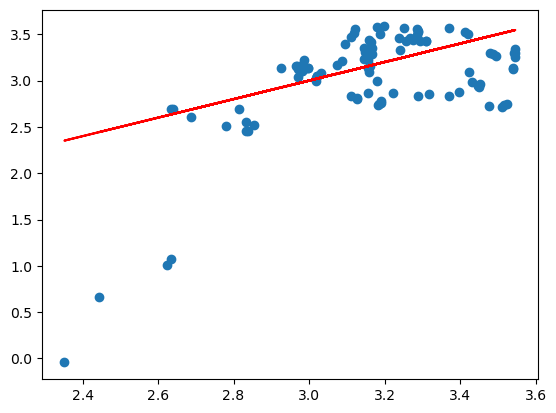

In [4]:
#plt.plot(avg_losses)
y_eval_pad = model.apply(params, x_train_pad, mask_train_pad)
plt.scatter(y_train_pad, y_eval_pad)
plt.plot(y_train_pad, y_train_pad, color='red')
print((jnp.mean((y_train_pad-y_eval_pad)**2)/jnp.mean((y_eval_pad-jnp.mean(y_eval_pad))**2))**0.5)


In [ ]:
# Training observations:
# - Loss is choppy (shoots back up and then down)
# - Stays at 0.1
# - Model should be able to fit the data

# Next steps:
# - Try to overfit a simple function (1. everywhere worked)
# - Try to overfit on a small data set ()
# - 